In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='C_Gly')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
1,0.008316,5.42330,5.257440,5.082890,4.941760,4.889070,4.941760,5.082890,5.257440,5.42330
2,0.016632,4.91898,4.619050,4.310910,4.070300,3.982320,4.070300,4.310910,4.619050,4.91898
3,0.024948,4.47689,4.101700,3.735870,3.463780,3.366550,3.463780,3.735870,4.101700,4.47689
4,0.033264,4.08773,3.676930,3.295010,3.021600,2.925470,3.021600,3.295010,3.676930,4.08773
5,0.041580,3.74350,3.320470,2.942120,2.678810,2.587250,2.678810,2.942120,3.320470,3.74350
6,0.049896,3.43749,3.015920,2.650320,2.401200,2.315250,2.401200,2.650320,3.015920,3.43749
7,0.058212,3.16417,2.752070,2.403410,2.169610,2.089400,2.169610,2.403410,2.752070,3.16417
8,0.066528,2.91896,2.520970,2.190890,1.972310,1.897640,1.972310,2.190890,2.520970,2.91896
9,0.074844,2.69806,2.316730,2.005590,1.801560,1.732090,1.801560,2.005590,2.316730,2.69806


In [2]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

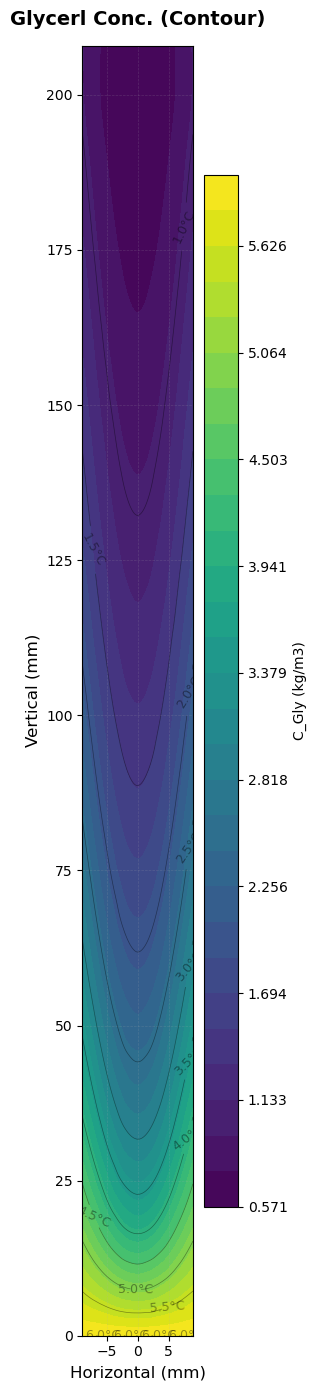

In [3]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m이므로 mm로 변환 (1000 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 온도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = temperature.flatten()

# cubic 보간으로 부드러운 온도 데이터 생성
temperature_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
levels = np.linspace(np.nanmin(temperature_fine), np.nanmax(temperature_fine), 30)
contourf = ax.contourf(X_fine, Y_fine, temperature_fine, levels=levels, cmap='viridis')
contour = ax.contour(X_fine, Y_fine, temperature_fine, levels=12, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.1f°C')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('Glycerl Conc. (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
cbar = plt.colorbar(contourf, ax=ax, label='C_Gly (kg/m3)', pad=0.02, shrink=0.8, aspect=30)
cbar.ax.tick_params(labelsize=10)

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('glycerol_contour.png', dpi=300, bbox_inches='tight')


In [5]:
import matplotlib as mpl
import os

# 현재 사용 중인 설정 파일
print("Current config:", mpl.matplotlib_fname())

Current config: /home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
